In [1]:
import pyscan as ps
import numpy as np
import matplotlib.pyplot as plt

Could not load Keysight SD1
Could not load Keysight SD1
pylablib not found, AttocubeANC350 not loaded
Basler Camera software not found, BaserCamera not loaded
Helios Camera not installed
msl not installed, Thorlabs BSC203 driver not loaded
seabreeze module not found, Ocean Optics not imported
Failed to load spinapi library.
spinapi is not installed, PulseBlaster driver not loaded.
Thorlabs Kinesis not found, ThorlabsBSC203 not loaded
Thorlabs Kinesis not found, ThorlabsBPC303 not loaded
Thorlabs Kinesis not found, ThorlabsMFF101 not loaded


In [2]:
devices = ps.ItemAttribute()

devices.v1 = ps.TestVoltage() # Device 1
devices.v2 = ps.TestVoltage() # Device 2
devices.v3 = ps.TestVoltage() # Device 3

In [8]:
def get_voltage_data(expt):
    """
    Reads the voltage from v1, v2, and v3 devices. Also adds a calculated value vsum.
    """

    runinfo = expt.runinfo
    devices = expt.devices

    d = ps.ItemAttribute()

    d.v1_readout = devices.v1.voltage
    d.v2_readout = devices.v2.voltage
    d.v3_readout = devices.v3.voltage

    d.vsum = d.v1_readout + d.v2_readout + d.v3_readout
    
    return d

In [15]:
@ps.live_plot
def custom_live_plot(expt):
    plt.plot(expt.v1_voltage, expt.v1_readout/4)
    plt.plot(expt.v1_voltage, expt.v2_readout)

    plt.xlabel('Custom x label')
    plt.ylabel('custom y label')
    
    plt.title('Custom Title')
    

In [16]:
# Create RunInfo instance and set scan0 to PropertyScan
runinfo = ps.RunInfo()
runinfo.scan0 = ps.PropertyScan({'v1': ps.drange(0, 0.1, 1)}, prop='voltage', dt=1)

# Set RunInfo measure_function (remember, it takes a Experiment object as a parameter and 
# returns an ItemAttribute containing data). This function is run every time the experiment iterates one scan variable.
runinfo.measure_function = get_voltage_data

# Create a Experiment class with the RunInfo and Devices just created
expt = ps.Experiment(runinfo, devices, time=True)
expt.start_thread()


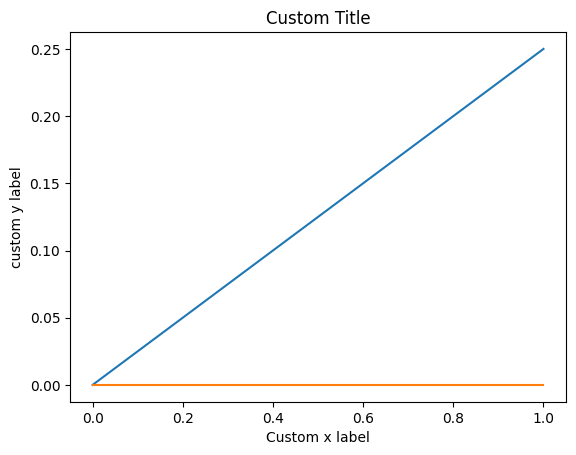

In [17]:
try:
    custom_live_plot(expt)
except KeyboardInterrupt:
    expt.stop()
